In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def _zero_out_utrs(y):
    # copied from HelixerSequence due to an import error
    y[..., 0] = np.logical_or(y[..., 0], y[..., 1])
    y[..., 1] = 0

In [3]:
def cross_entropy(y_true, y_pred):
    true_class_preds = y_pred[y_true.astype(np.bool)]
    losses = -np.log(true_class_preds)
    return losses

In [15]:
def dna_sequence(y):
    letters = 'CATG'
    sequence = ''.join([letters[idx] for idx in np.nonzero(y)[1]])
    return sequence

In [4]:
p = h5py.File('/home/felix/Desktop/x9HyB_Crubella_predictions.h5', 'r')
d = h5py.File('/home/felix/git/HelixerPrep/data/plants/single_genomes/Crubella/test_data.h5', 'r')

In [22]:
X = d['data/X'][:]
y_true = d['data/y'][:]
y_pred = p['predictions'][:]
sw = d['data/sample_weights'][:]
seqids = d['data/seqids'][:]
species = d['data/species'][:]
start_ends = d['data/start_ends'][:]
print(f'{X.shape=}, {y_true.shape=}, {y_pred.shape=}, {sw.shape=}')

_zero_out_utrs(y_true)
y_true, y_pred = np.delete(y_true, 1, axis=-1), np.delete(y_pred, 1, axis=-1)

X.shape=(12424, 20000, 4), y_true.shape=(12424, 20000, 4), y_pred.shape=(12424, 20000, 4), sw.shape=(12424, 20000)


In [6]:
losses = np.zeros(y_true.shape[0])
full_losses = []
for i in range(y_true.shape[0]):
    full_losses.append(cross_entropy(y_true[i], y_pred[i]))
    losses[i] = np.mean(full_losses[-1])
loss_idx = np.argsort(losses)

In [8]:
losses[loss_idx][:10]

array([0.00094652, 0.00106525, 0.00111294, 0.00132084, 0.00133991,
       0.00134468, 0.00138855, 0.00139713, 0.00142002, 0.00145054])

<AxesSubplot:>

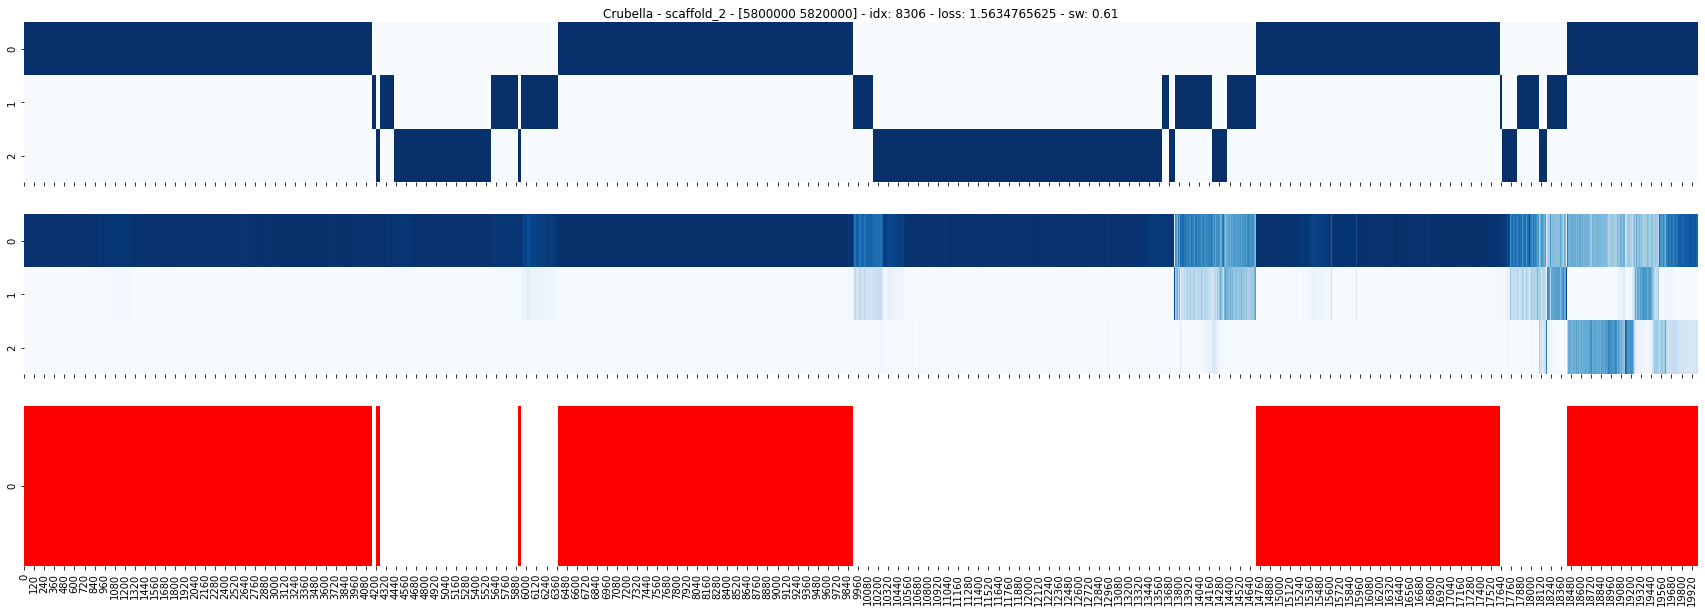

In [32]:
idx = loss_idx[-(np.random.randint(100) + 1)]  # choose sample from the 20 with the highest loss
fig, axes = plt.subplots(3, figsize=(30, 10), sharex=True)
axes[0].set_title(f'{species[idx].decode()} - {seqids[idx].decode()} - {start_ends[idx]} - idx: {idx} - loss: {losses[idx]} - sw: {np.count_nonzero(sw[idx] == 0) / sw.shape[1]:.2f}')
for i, y in enumerate([y_true, y_pred]):
    sns.heatmap(y[idx].T, cbar=False, cmap='Blues', ax=axes[i])
sns.heatmap(sw[idx][:, None].T, cbar=False, cmap=['red', 'white'], ax=axes[2])

In [33]:
dna_sequence(X[idx][4200:7000])

'GCTGAGAAAGGTCATAAAATCACTTTTTTGCTCCCCAATAAATCCCAAAAGCAACTTGAGCTACCTCTATAGCTCACGACCTTATCCCTGGTGGTGAACTAGGAGTTCCTCCACATGGTTATCCTTCATCAAAGGCGTTGTATCGCAAAAACGATGCTCATGCCTTGTTGATCTTCTCTAGTTTTTACAAGACGTTTTATCATAGGCTCATGATATATCATGGTTTTTACGGGTTTTTGGCCATGATATAAGTCTTATTTATAGAGATTTTATAGTGTTTTCGAGTCTTTTGCAGTCATTTCAGGATTAGGAGCTATTTGGCATGGATTGAAGCTTTTGGAGCATTTGGGAGCATTTGGAGAAGATGTGCCGAAGGAACGTACCGGGAGAGCATATTTGGTGTGAGGGTCGAGCGTCACAACCTATGGTGTCGATCGACACCAATATCTGACGGCAATTGAATTTCTCGATTAATTGAAGTTCAGAAGATTTGTAGATTCGGCCCAGAAGTTTCCCTTATTTACAATTAAGTCCAGTTCGTGGTTAAGACATATATATTGAGTTTTAGGGTTTTGTTAAGACTTAAGCTTTATTTTAGAGAGAGAGAGATTTGTAGAGAGCCAGGAGAGAAGAATCCAAACCTCTTTCAGAGAAGATTCAGAACTCCTTTACTTCTTCTATTACTTTCTTTTATGATATCTATTTTATTCATGATGTTTGTTTCATTCACCATGTTTGAGTAGATTTCTTGTTAGGTTTAGGGTTTTCAAAGGAATTTATGAATTGTTAGGTTGTTAGATTGTTAGGATTGAATCAATAGAGTTCTTCATCTAGATTGTGGTTAATTTGTTCTAGAGTAGTGAAAGCAACCTAGAATATGATCTTAGGTTAATTGGTAGACACGAAAGTGTTATTGATTTCCTGAAAATAATCTAGATGAGCAAAATTCCTATTCGCAAAGAGATTTGGTTTAGGGATTTTGTGAACTTATCAAACCTG